In [51]:
!pip install shap


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
import pandas as pd
import shap
from joblib import load


In [53]:
from config import FINAL_TRAINED_FEATURES_PATH, VALIDATION_DATASET_PATH, VALIDATION_LABELS_PATH
from config import FINAL_MODEL_PATH

# Load the trained model
model = load(FINAL_MODEL_PATH)  # Update path to your model

# Load the feature names used in training
trained_feature_names = load(FINAL_TRAINED_FEATURES_PATH)  # Update path

# Load the validation/test dataset
X_val = pd.read_parquet(VALIDATION_DATASET_PATH)  # Update path
y_val = pd.read_parquet(VALIDATION_LABELS_PATH)  # Update path

# Ensure the feature alignment with the trained model
X_val_aligned = X_val.reindex(columns=trained_feature_names, fill_value=0)


In [54]:
# Initialize the SHAP Explainer
explainer = shap.Explainer(model)

# Compute SHAP values for the validation set
shap_values = explainer(X_val_aligned)


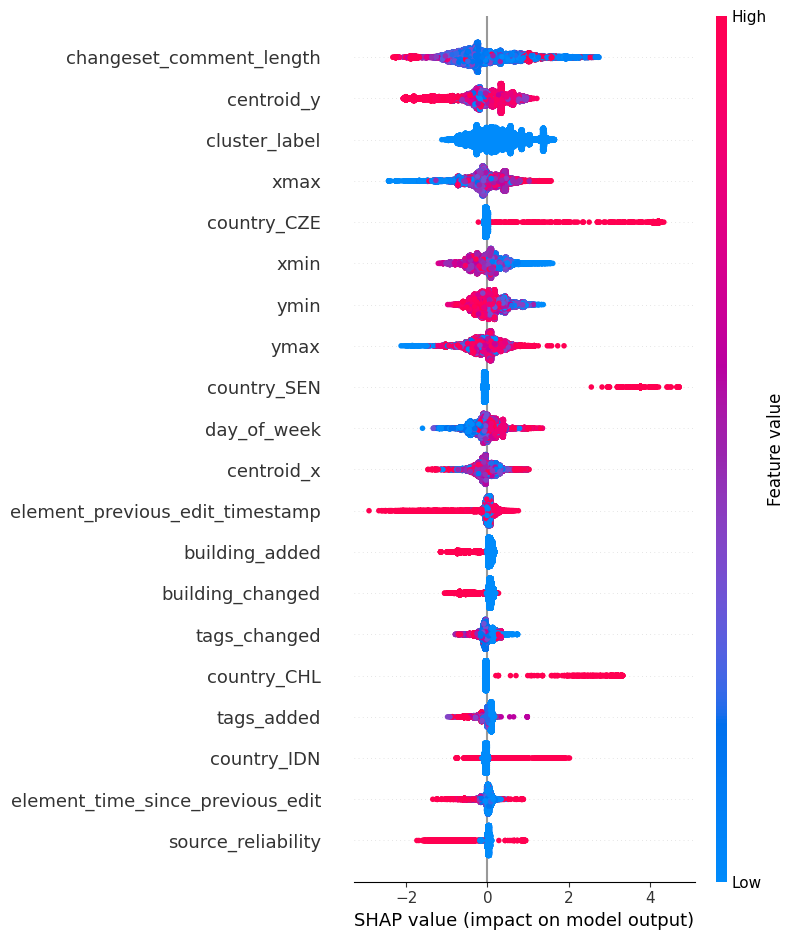

In [55]:
# Global feature importance summary
shap.summary_plot(shap_values, X_val_aligned)


In [56]:
# import pandas as pd
# import numpy as np
# 
# # Extract SHAP values for the feature `n_edits`
# n_edits_shap_values = shap_values[:, X_val_aligned.columns.get_loc("n_edits")]
# 
# # Combine SHAP values and feature values into a DataFrame
# n_edits_analysis = pd.DataFrame({
#     "n_edits": X_val_aligned["n_edits"],
#     "n_edits_shap_value": n_edits_shap_values.values
# })
# 
# # Summary statistics
# summary = n_edits_analysis.describe()
# 
# # Correlation between `n_edits` and its SHAP values
# correlation = n_edits_analysis.corr()
# 
# # Segmentation analysis
# # Group `n_edits` into bins and calculate the mean SHAP value in each bin
# n_edits_analysis["n_edits_bins"] = pd.cut(n_edits_analysis["n_edits"], bins=10)
# bin_summary = n_edits_analysis.groupby("n_edits_bins")["n_edits_shap_value"].mean()
# 
# # Print results
# print("Summary Statistics:\n", summary)
# print("\nCorrelation between n_edits and its SHAP values:\n", correlation)
# print("\nMean SHAP values in bins of n_edits:\n", bin_summary)


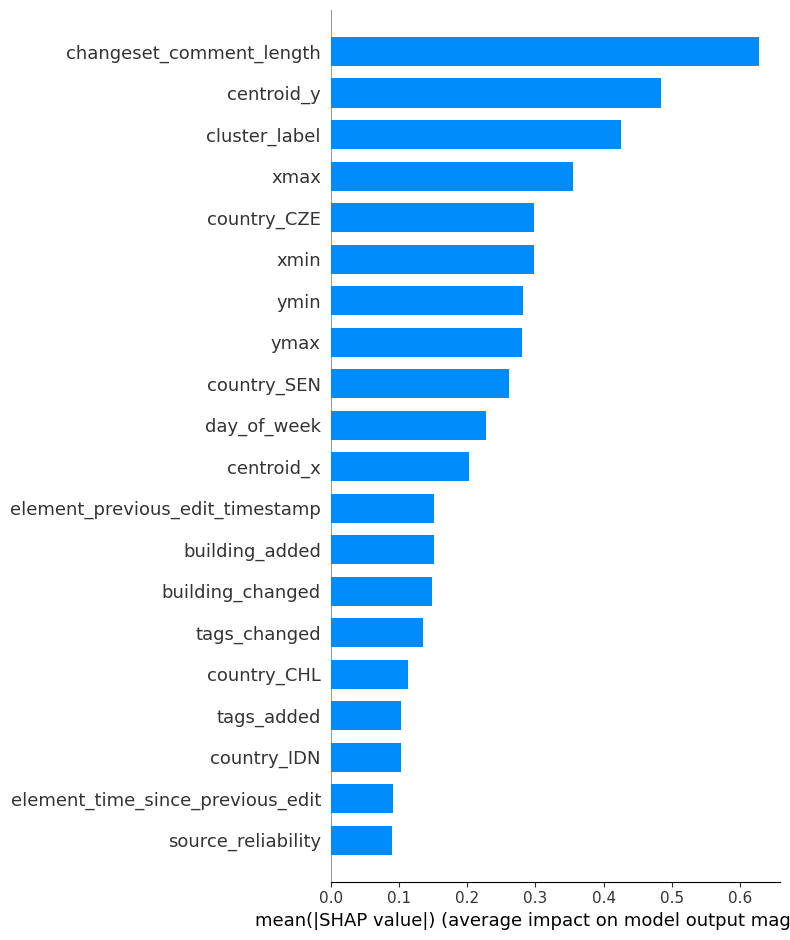

In [57]:
# Bar plot for average feature importance
shap.summary_plot(shap_values, X_val_aligned, plot_type="bar")


In [58]:
# Select a specific feature to analyze (replace 'feature_name' with your feature)
# shap.dependence_plot("feature_name", shap_values, X_val_aligned)


float64


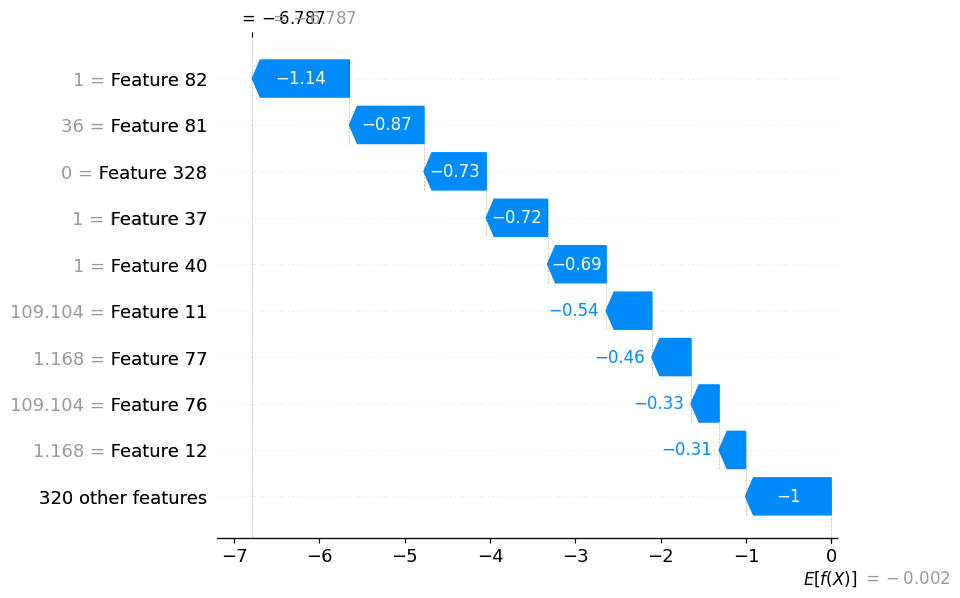

In [59]:
# Select an individual instance to explain

instance_index = 0  # Replace with desired index

# Convert boolean values in the instance to int
bool_columns = X_val_aligned.select_dtypes(include=['bool']).columns
X_val_aligned[bool_columns] = X_val_aligned[bool_columns].astype(int)

# Fetch the instance
instance = X_val_aligned.iloc[instance_index]

# Double-check that no `object` type remains
print(instance.dtypes)

# Ensure the instance is reshaped into a 2D structure
instance_2d = instance.values.reshape(1, -1)

# Explain the prediction for this reshaped instance
shap_values_instance = explainer(instance_2d)

# Waterfall plot for the instance
shap.waterfall_plot(shap_values_instance[0])


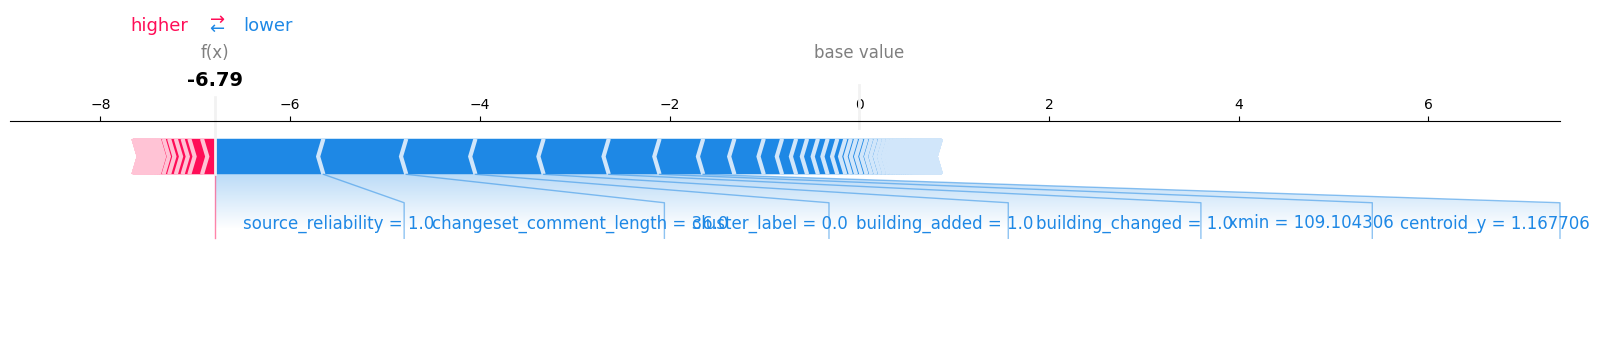

SHAP force plot saved as 'shap_force_plot.png'.


In [60]:
import shap
import matplotlib.pyplot as plt

# Check if the expected value is a scalar or list
if isinstance(explainer.expected_value, list):
    # Multi-class model, use appropriate class index
    expected_value = explainer.expected_value[0]
else:
    # Single-class model, use scalar directly
    expected_value = explainer.expected_value

# Check if shap_values_instance has the correct attribute
if hasattr(shap_values_instance, 'values'):
    shap_values = shap_values_instance.values
else:
    shap_values = shap_values_instance

# Generate the force plot
shap.initjs()
force_plot = shap.force_plot(expected_value, shap_values, instance, matplotlib=True)

# Save the plot as an image
# plt.savefig("shap_force_plot.png", bbox_inches="tight")
# plt.close()
#
# print("SHAP force plot saved as 'shap_force_plot.png'.")
